Dataset: https://www.kaggle.com/uciml/iris.
In this short notebook, I'll try to predict Iris species with machine learning methods

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


In [38]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [41]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Text(0.5, 1.0, 'Pearson Correlation Heatmap \n')

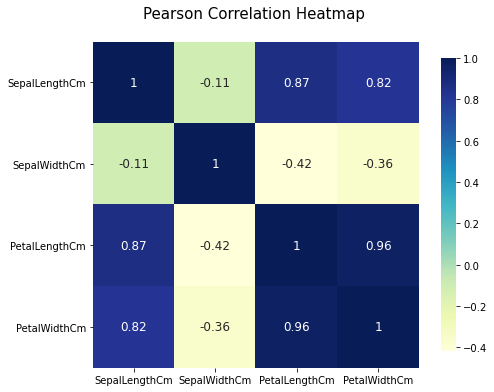

In [42]:
corr = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

plt.figure(figsize=(8, 6))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap='YlGnBu', square=True, annot=True,
            cbar_kws={'shrink': .9}, annot_kws={'fontsize': 12},
            vmax=1.0)
plt.yticks(rotation=360)
plt.title('Pearson Correlation Heatmap \n', size=15)

We can see that PetalLength and PetalWidth are strongly correlated (nearly 1), also, both have strong correlation with SepalLength, but not SepalWidth.

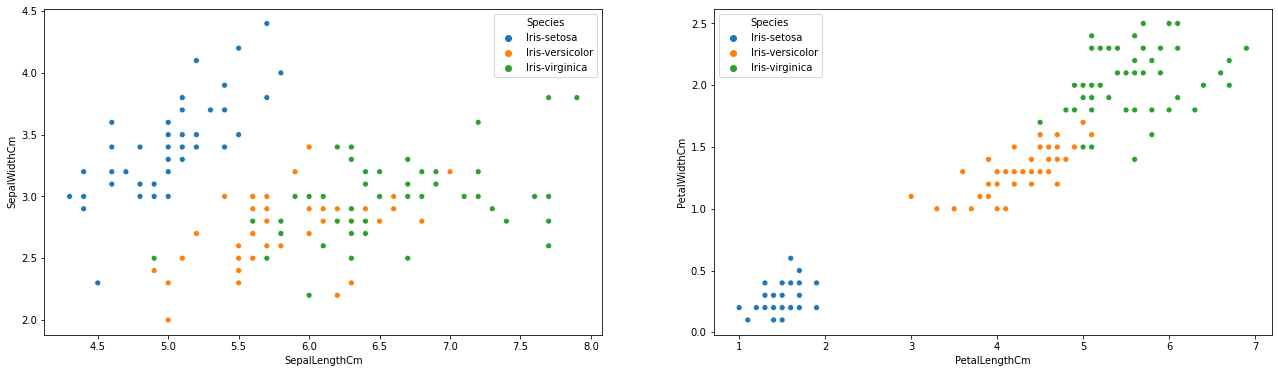

In [43]:
fig, ax = plt.subplots(1,2, figsize=(22, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', ax=ax[0])
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', ax=ax[1])

From the 2 plots we can see that it is easier if we do classification based on PetalLength. Now let's see the regression lines.

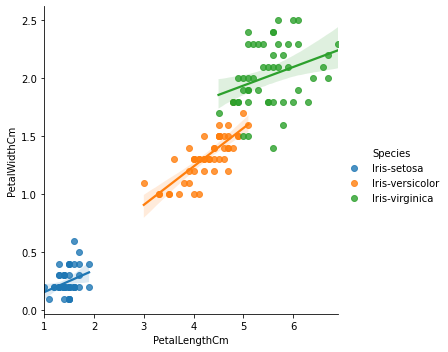

In [44]:
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')

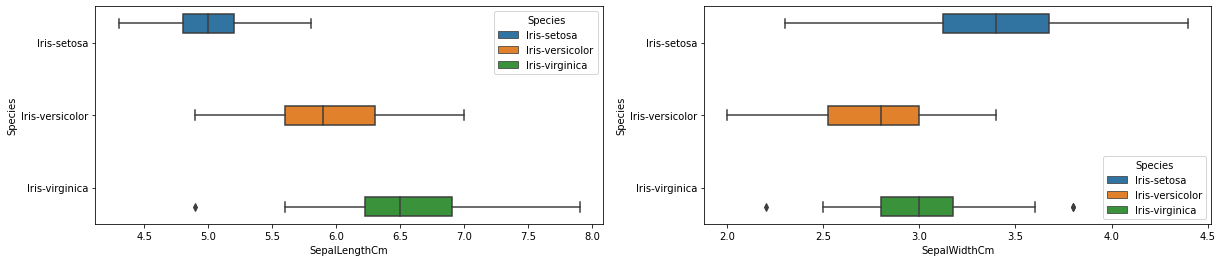

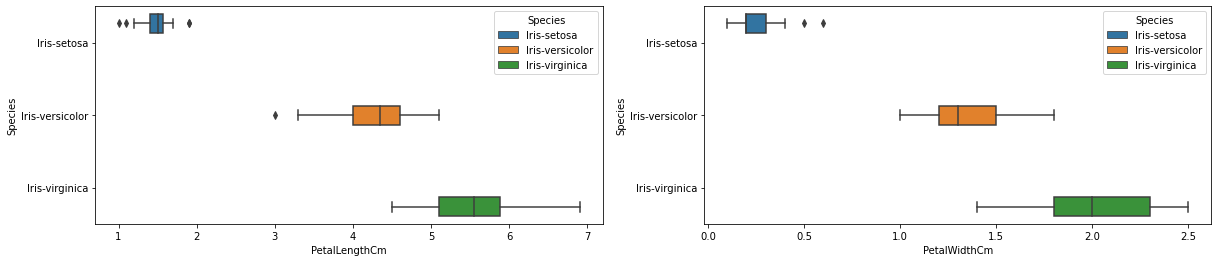

In [45]:
fig, ax = plt.subplots(1,2, figsize=(20, 4))
sns.boxplot(y='Species', x='SepalLengthCm', data=df, hue='Species', ax=ax[0])
sns.boxplot(y='Species', x='SepalWidthCm', data=df, hue='Species', ax=ax[1])

fig, ax = plt.subplots(1,2, figsize=(20, 4))
sns.boxplot(y='Species', x='PetalLengthCm', data=df, hue='Species', ax=ax[0])
sns.boxplot(y='Species', x='PetalWidthCm', data=df, hue='Species', ax=ax[1])

Overall, Iris Setosa is the smallest of the three except for SepalWidth. Also, Iris Virginica always larger than Iris Versicolor.

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score

In [47]:
# Encode target label using LabelEncoder
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [48]:
# Machine learning method for classification
MLA = [
    
    # Ensemble methods
    ExtraTreesClassifier(max_leaf_nodes=3),
    RandomForestClassifier(max_depth=3),
    
    # Linear models
    LogisticRegression(),
    
    # Navies bayes
    GaussianNB(),
    
    # Nearest neighbor
    KNeighborsClassifier(n_neighbors=3),
    
    # SVM
    SVC(kernel='linear'),
    
    # Trees    
    DecisionTreeClassifier()]

# Create table to compare MLA metrics
MLA_compare = pd.DataFrame(columns=['MLA Name', 'MLA Test Accuracy'])

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    model_fitted = alg.fit(X_train, y_train)
    model_pred = alg.predict(X_test)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = accuracy_score(model_pred, y_test)
    row_index += 1

MLA_compare.sort_values(by=['MLA Test Accuracy'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Test Accuracy
3,GaussianNB,0.955556
5,SVC,0.955556
0,ExtraTreesClassifier,0.933333
1,RandomForestClassifier,0.933333
2,LogisticRegression,0.933333
4,KNeighborsClassifier,0.933333
6,DecisionTreeClassifier,0.933333
